In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
smh = pd.read_csv("smh_5y.csv")
nbet = pd.read_csv("nbet_5y.csv")
ppa = pd.read_csv("ppa_5y.csv")
xme = pd.read_csv("xme_5y.csv")
spdr = pd.read_csv("spdr_5y.csv")
pph = pd.read_csv("pph_5y.csv")
sp = pd.read_csv("sp500_5y.csv")
vix = pd.read_csv("vix_5y.csv")

In [4]:
smh["Date"] = smh["Date"].str.slice(0,10)
nbet["Date"] = nbet["Date"].str.slice(0,10)
ppa["Date"] = ppa["Date"].str.slice(0,10)
xme["Date"] = xme["Date"].str.slice(0,10)
spdr["Date"] = spdr["Date"].str.slice(0,10)
pph["Date"] = pph["Date"].str.slice(0,10)
sp["Date"] = sp["Date"].str.slice(0,10)
vix["Date"] = vix["Date"].str.slice(0,10)

In [5]:
smh["returns"] = smh["close"].pct_change()
nbet["returns"] = nbet["close"].pct_change()
ppa["returns"] = ppa["close"].pct_change()
xme["returns"] = xme["close"].pct_change()
spdr["returns"] = spdr["close"].pct_change()
pph["returns"] = pph["close"].pct_change()
sp["returns"] = sp["close"].pct_change()
vix["returns"] = vix["close"].pct_change()

In [6]:
corr_return = pd.DataFrame({
    "smh_returns": smh["returns"].copy(),
    "nbet_returns": nbet["returns"].copy(),
    "ppa_returns": ppa["returns"].copy(),
    "xme_returns": xme["returns"].copy(),
    "spdr_returns": spdr["returns"].copy(),
    "pph_returns": pph["returns"].copy(),
    "sp_returns": sp["returns"].copy()
})

corr_return.head()

,smh_returns,nbet_returns,ppa_returns,xme_returns,spdr_returns,pph_returns,sp_returns
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014690,-0.004158,0.002498,0.011507,0.001798,0.005916,0.000335
2,0.006020,-0.009980,0.000879,0.008532,0.009134,0.001431,-0.000432
3,0.014845,-0.012651,0.006005,0.008107,-0.003144,0.013175,0.004459
4,-0.006717,0.005654,-0.006114,0.009441,-0.001115,-0.002977,0.004945


In [7]:
corr_return["port_return"] = (
        0.0696 * corr_return["smh_returns"] + 0.0844 * corr_return["nbet_returns"] + 0.0268 * corr_return["ppa_returns"]
        + 0.0248 * corr_return["xme_returns"] + 0.1096 *corr_return["spdr_returns"] + 0.0848 * corr_return["pph_returns"]
        + 0.3 * 0.0436 + 0.3 * 0.0476
    )
corr_return.head()

,smh_returns,nbet_returns,ppa_returns,xme_returns,spdr_returns,pph_returns,sp_returns,port_return
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014690,-0.004158,0.002498,0.011507,0.001798,0.005916,0.000335,0.029083
2,0.006020,-0.009980,0.000879,0.008532,0.009134,0.001431,-0.000432,0.028294
3,0.014845,-0.012651,0.006005,0.008107,-0.003144,0.013175,0.004459,0.028460
4,-0.006717,0.005654,-0.006114,0.009441,-0.001115,-0.002977,0.004945,0.027065


In [8]:
corr = corr_return["sp_returns"].corr(corr_return["port_return"])

<Axes: >

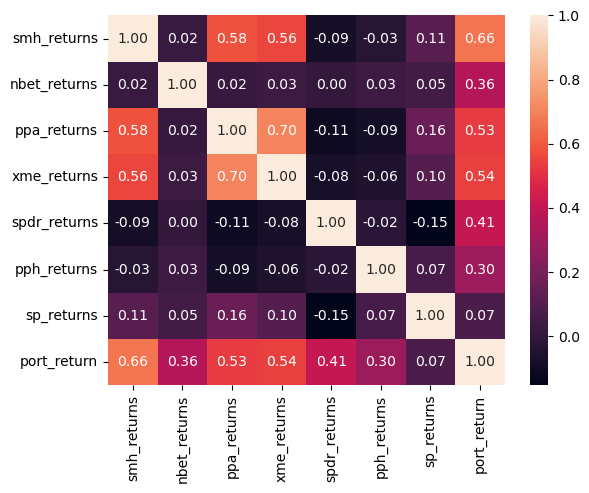

In [10]:
a = corr_return.corr()
sns.heatmap(a, annot=True, fmt=".2f")

In [5]:
returns = pd.DataFrame({
    "smh_returns": smh["returns"].copy(),
    "nbet_returns": nbet["returns"].copy(),
    "ppa_returns": ppa["returns"].copy(),
    "xme_returns": xme["returns"].copy(),
    "spdr_returns": spdr["returns"].copy(),
    "pph_returns": pph["returns"].copy(),
    "vix_returns": vix["returns"].copy(),
    "smh_volatility": smh["returns"].rolling(window=21).std(),
    "nbet_volatility": nbet["returns"].rolling(window=21).std(),
    "ppa_volatility": ppa["returns"].rolling(window=21).std(),
    "xme_volatility": xme["returns"].rolling(window=21).std(),
    "spdr_volatility": spdr["returns"].rolling(window=21).std(),
    "pph_volatility": pph["returns"].rolling(window=21).std(),
    "vix_volatility": vix["returns"].rolling(window=21).std(),
})

print(returns.shape)

(1259, 14)


In [6]:
returns = returns.reset_index().drop(axis=1,labels="index")
returns.head()

,smh_returns,nbet_returns,ppa_returns,xme_returns,spdr_returns,pph_returns,vix_returns,smh_volatility,nbet_volatility,ppa_volatility,xme_volatility,spdr_volatility,pph_volatility,vix_volatility
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.014690,-0.004158,0.002498,0.011507,0.001798,0.005916,0.070423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.006020,-0.009980,0.000879,0.008532,0.009134,0.001431,-0.072682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.014845,-0.012651,0.006005,0.008107,-0.003144,0.013175,-0.018919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.006717,0.005654,-0.006114,0.009441,-0.001115,-0.002977,-0.061984,NaN,NaN,NaN,NaN,NaN,NaN,NaN


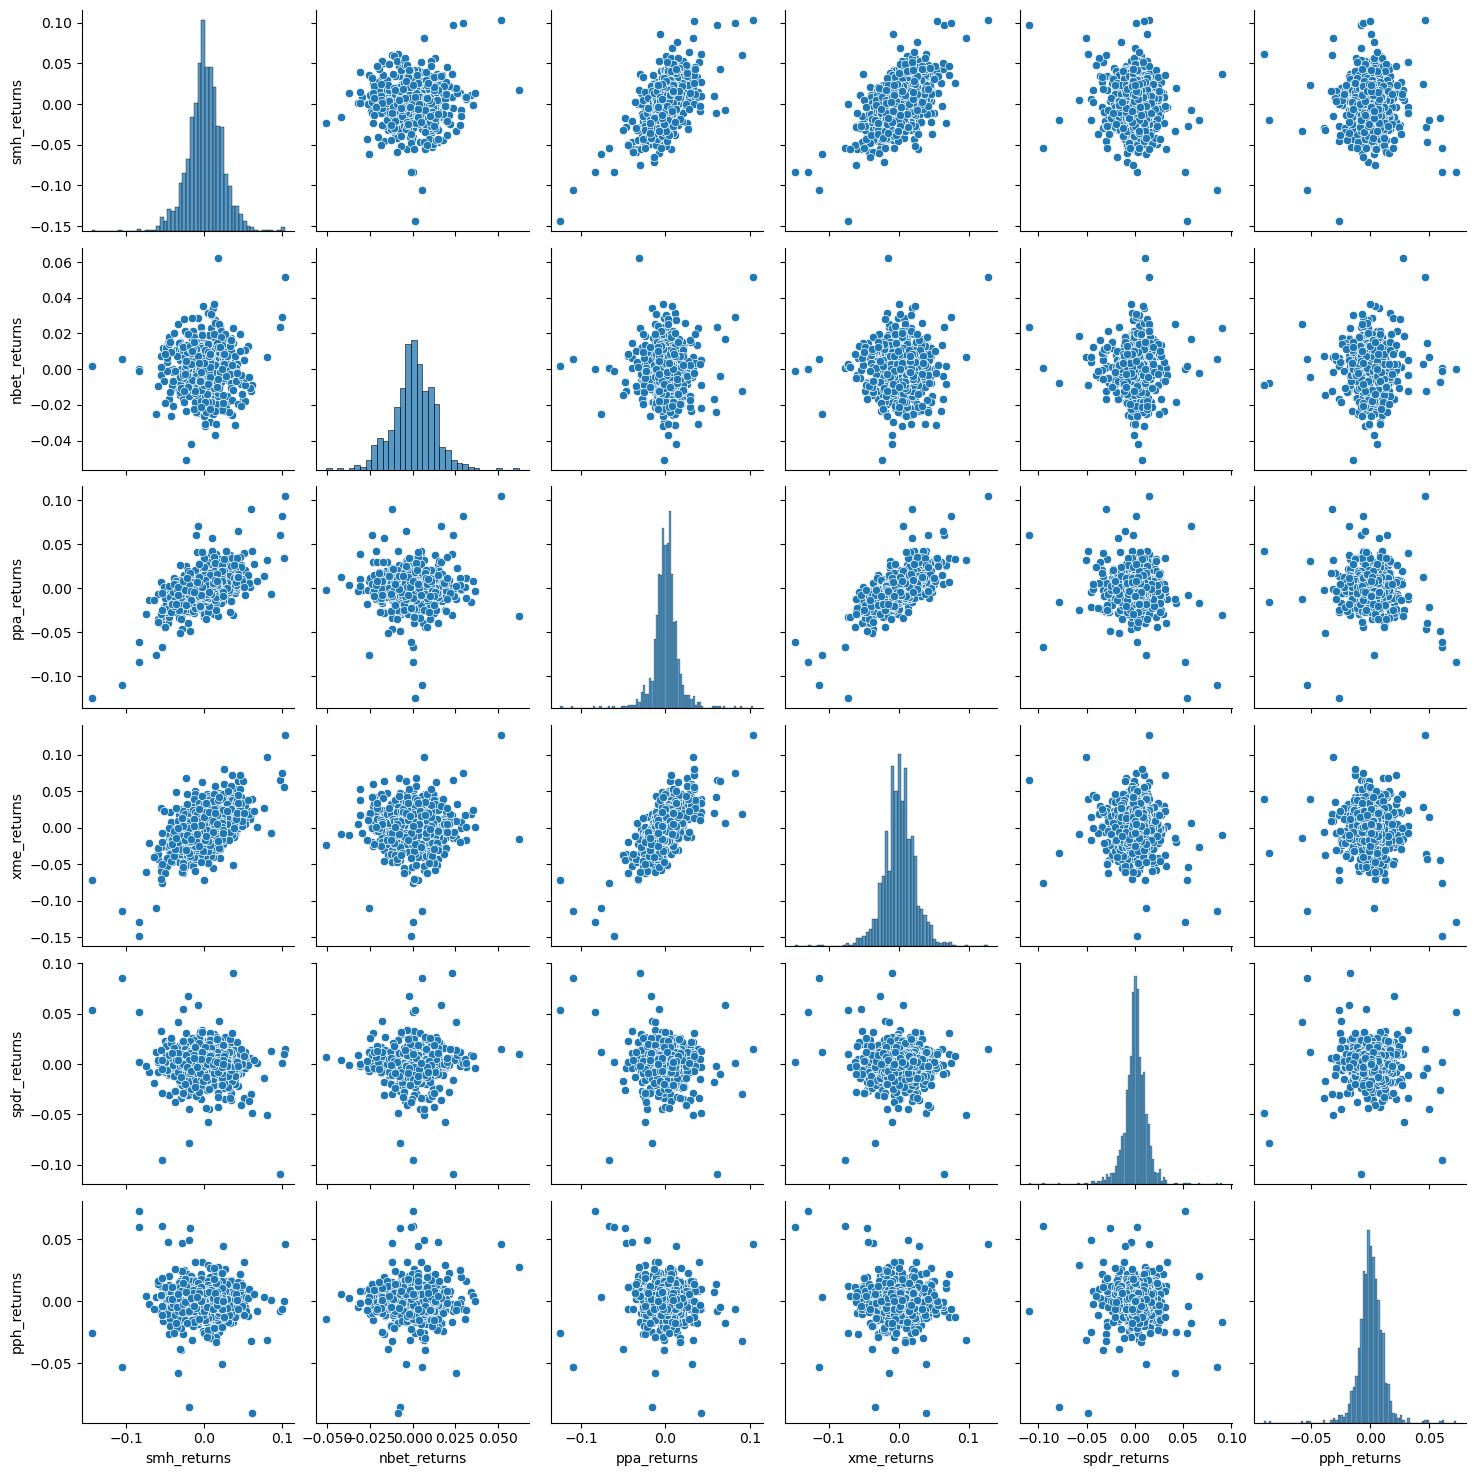

In [40]:
sns.pairplot(data=returns, x_vars=["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"],
             y_vars=["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"])

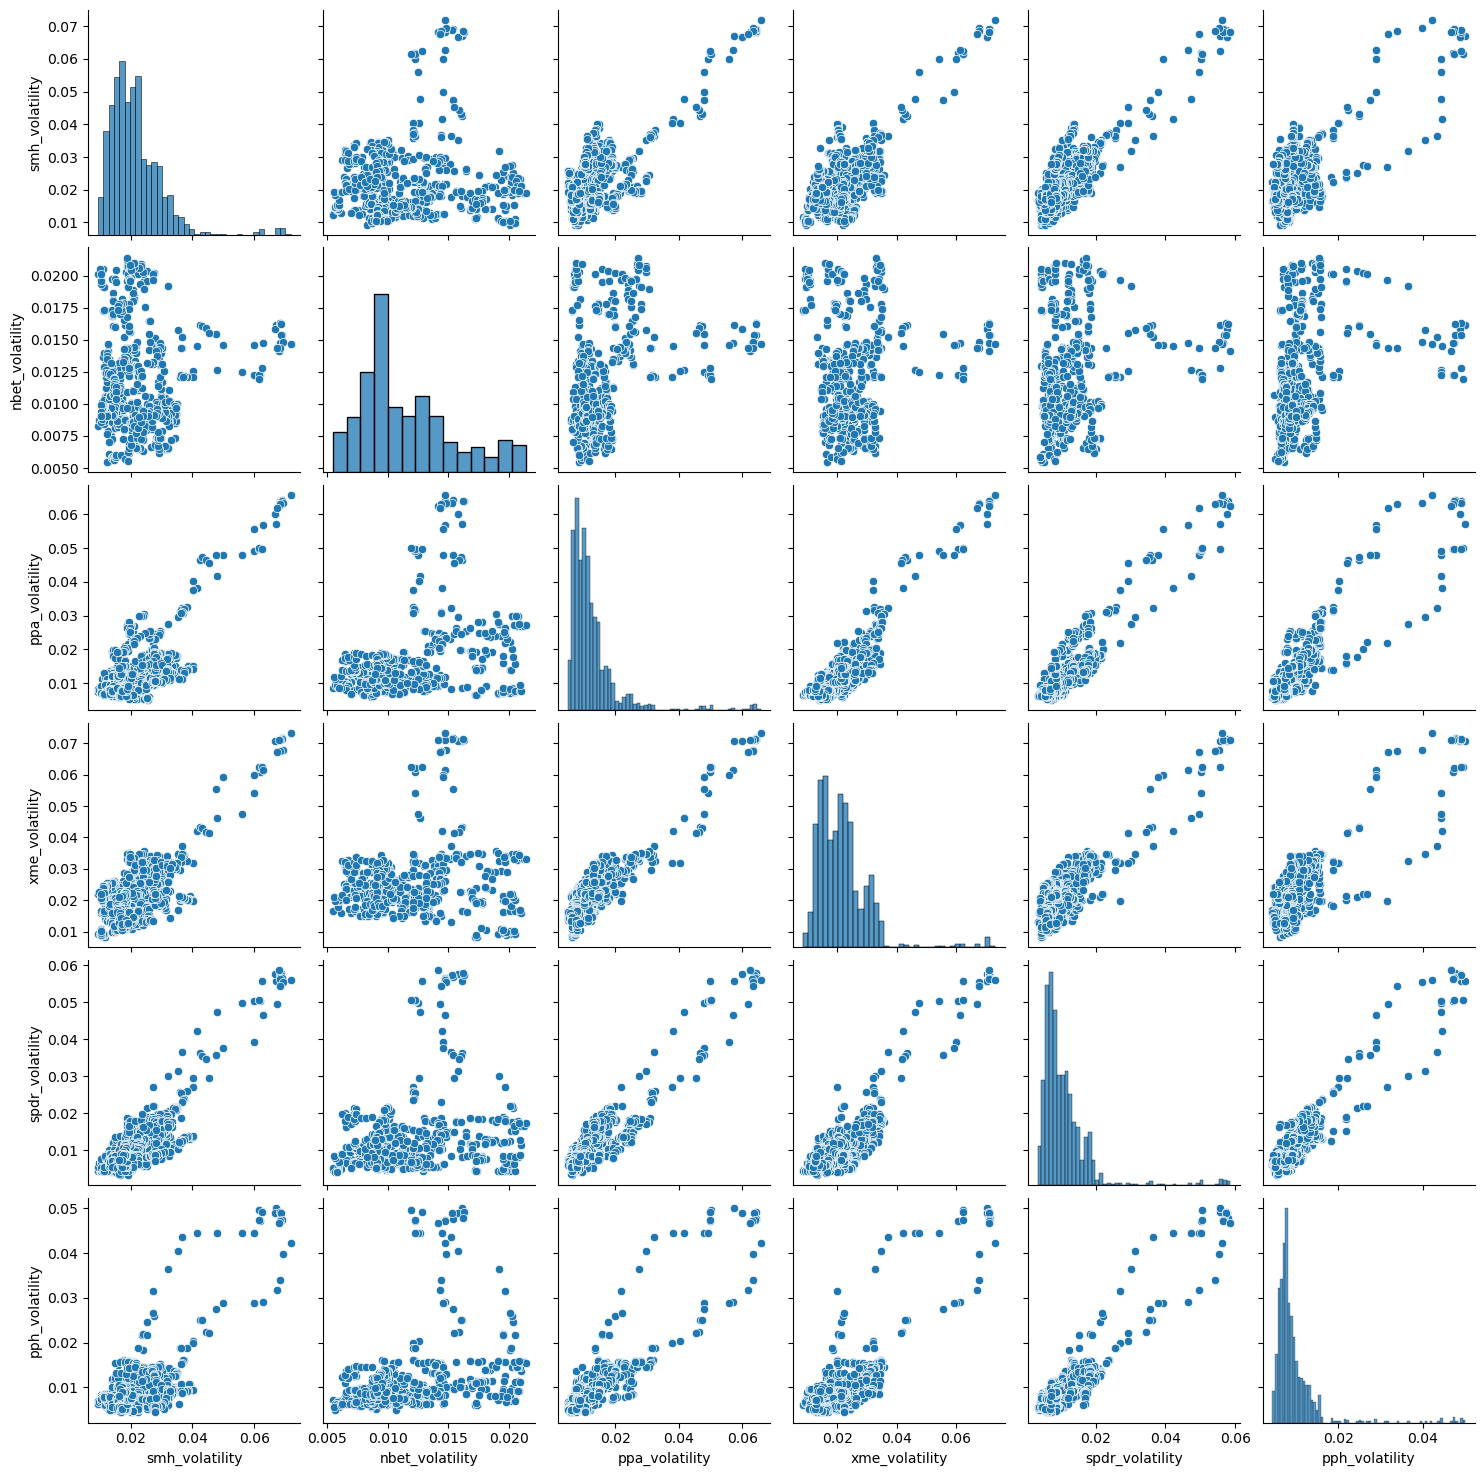

In [41]:
sns.pairplot(data=returns, x_vars=["smh_volatility","nbet_volatility", "ppa_volatility","xme_volatility","spdr_volatility","pph_volatility"],
             y_vars=["smh_volatility","nbet_volatility", "ppa_volatility","xme_volatility","spdr_volatility", "pph_volatility"])

In [7]:
returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].mean()*250

smh_returns     0.342124
nbet_returns    0.136741
ppa_returns     0.149705
xme_returns     0.257713
spdr_returns    0.168931
pph_returns     0.105400
dtype: float64

In [8]:
returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].cov()*250

,smh_returns,nbet_returns,ppa_returns,xme_returns,spdr_returns,pph_returns
smh_returns,0.131596,0.001519,0.050341,0.073487,-0.006536,-0.002157
nbet_returns,0.001519,0.037517,0.000963,0.002683,0.000186,0.001378
ppa_returns,0.050341,0.000963,0.056832,0.061189,-0.005599,-0.003812
xme_returns,0.073487,0.002683,0.061189,0.133092,-0.005988,-0.003797
spdr_returns,-0.006536,0.000186,-0.005599,-0.005988,0.043475,-0.000710
pph_returns,-0.002157,0.001378,-0.003812,-0.003797,-0.000710,0.031087


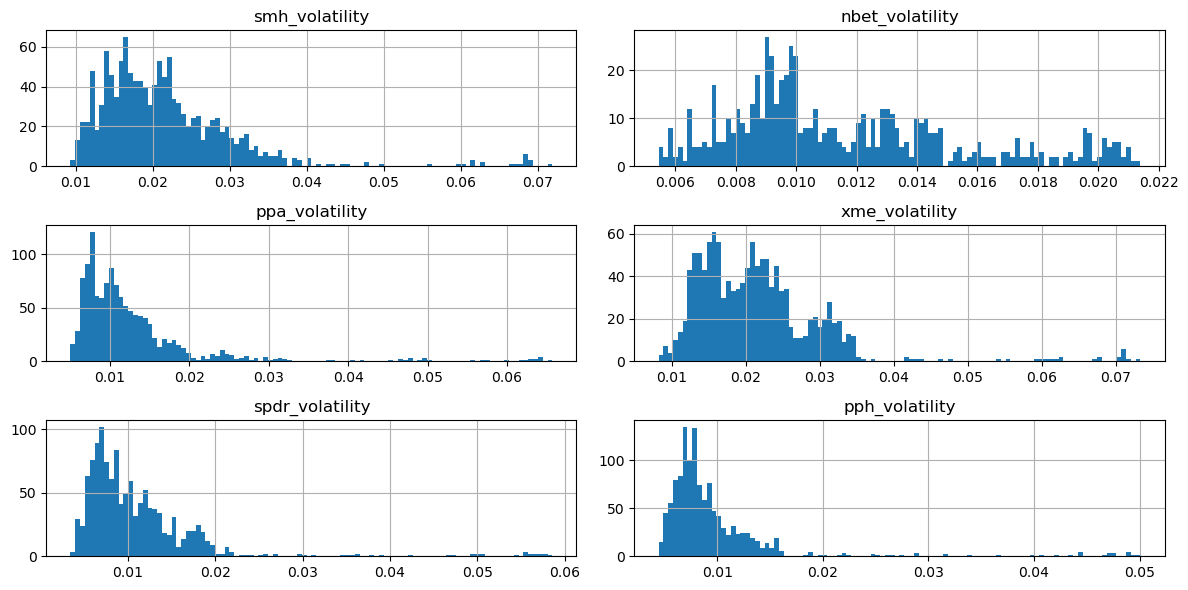

In [9]:
returns[["smh_volatility","nbet_volatility", "ppa_volatility","xme_volatility","spdr_volatility","pph_volatility"]].hist(figsize=(12,6), bins=100)
plt.tight_layout()

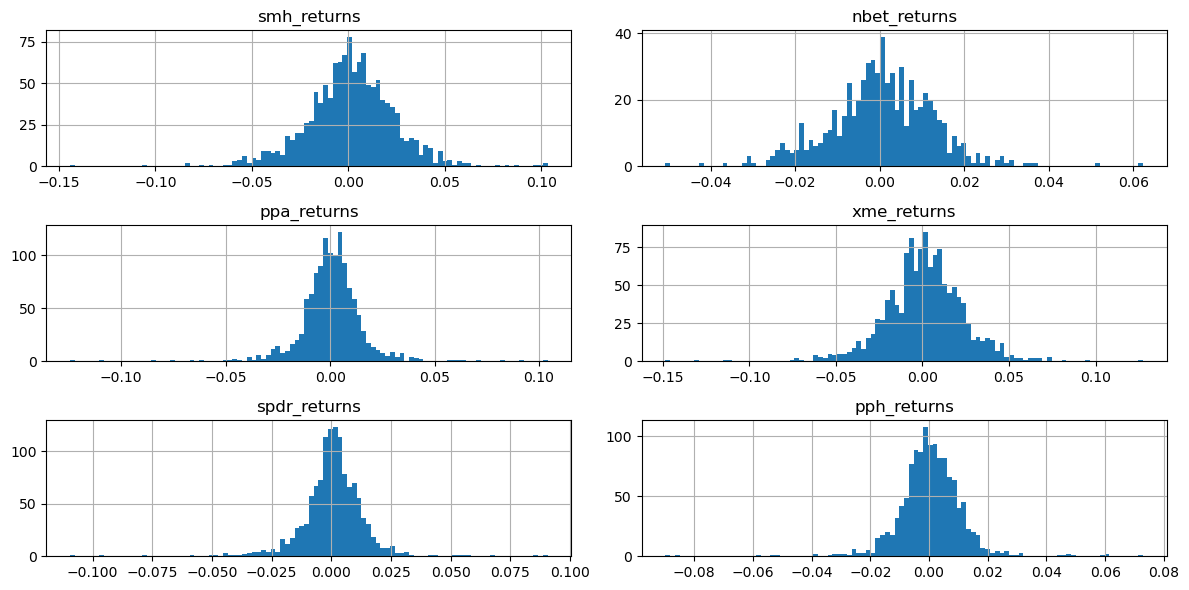

In [10]:
returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].hist(figsize=(12,6), bins=100)
plt.tight_layout()

In [11]:
np.random.seed(42)

weights_list=[]
returns_list = []
volatility_list = []
SR_list = []

for i in range(20000):
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    weights_list.append(weights)
    port_return = np.sum(returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].mean()*250*weights)
    returns_list.append(port_return)
    port_vol = np.sqrt(np.dot(weights.T,
                            np.dot(returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].cov()*250, weights)))
    volatility_list.append(port_vol)
    SR = (port_return-0.0434)/port_vol
    SR_list.append(SR)

In [13]:
SR_list = np.array(SR_list)

In [14]:
returns_list = np.array(returns_list)
volatility_list = np.array(volatility_list)

idx = np.where((volatility_list>0.11) & (volatility_list<0.12))

In [15]:
weights_list = np.array(weights_list)

In [16]:
efficient = pd.DataFrame({
    "return": returns_list[idx],
    "volatility": volatility_list[idx],
    "weights_0": [row[0] for row in weights_list[idx]],
    "weights_1": [row[1] for row in weights_list[idx]],
    "weights_2": [row[2] for row in weights_list[idx]],
    "weights_3": [row[3] for row in weights_list[idx]],
    "weights_4": [row[4] for row in weights_list[idx]],
    "weights_5": [row[5] for row in weights_list[idx]]
})
efficient.head()


,return,volatility,weights_0,weights_1,weights_2,weights_3,weights_4,weights_5
0,0.166746,0.112789,0.091719,0.030859,0.116153,0.064629,0.372689,0.323952
1,0.150571,0.110899,0.019751,0.286229,0.328212,0.008035,0.248058,0.109715
2,0.167209,0.113265,0.040089,0.157366,0.113495,0.104417,0.416405,0.168228
3,0.167008,0.111649,0.095456,0.353214,0.137272,0.011888,0.315578,0.086591
4,0.173844,0.112032,0.134652,0.277645,0.014333,0.017551,0.386558,0.169261


In [19]:
efficient = efficient[(efficient["return"] > 0.18) & (efficient["return"] < 0.20)]

In [20]:
efficient[["weights_0","weights_1","weights_2","weights_3","weights_4","weights_5"]].mean()

weights_0    0.173861
weights_1    0.211114
weights_2    0.066934
weights_3    0.062087
weights_4    0.274018
weights_5    0.211986
dtype: float64

In [ ]:
"smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"

In [22]:
weights = np.array([0.173861,0.211114,0.066934,0.062087,0.274018,0.211986])
port_return = np.sum(returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].mean()*250*weights)
print(f"return is: {port_return}")
port_vol = np.sqrt(np.dot(weights.T,
                        np.dot(returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns","spdr_returns","pph_returns"]].cov()*250, weights)))
print(f"volatility is: {port_vol}")
SR = (port_return-0.0434)/port_vol
print(f"Sharpe Ratio is: {SR}")

return is: 0.18300437918433238
volatility is: 0.1149704198210809
Sharpe Ratio is: 1.214263454909422


In [18]:
efficient[["return","volatility"]].mean()

return        0.204879
volatility    0.145145
dtype: float64

In [20]:
np.where(returns_list==returns_list[idx].max())

(array([17492], dtype=int64),)

In [22]:
weights_list[17492]

array([0.30021489, 0.25230003, 0.01761709, 0.04466369, 0.38520431])

In [54]:
SR_list.max()

1.2311521574209034

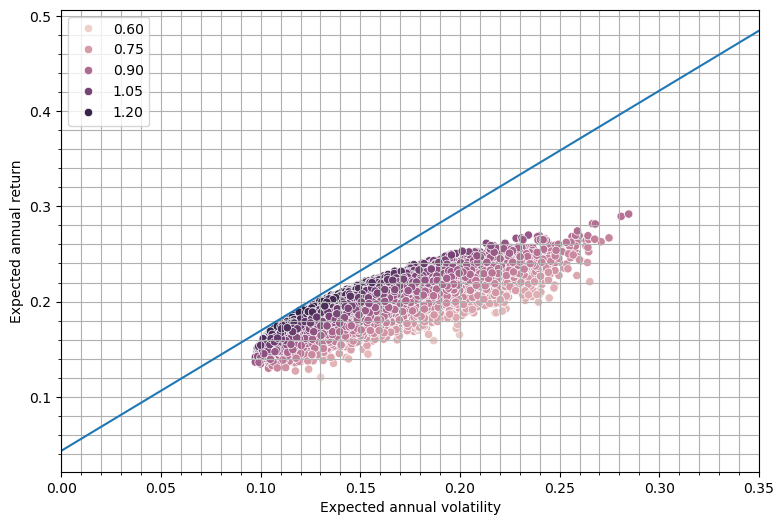

In [18]:
x = np.linspace(0,0.35,100)
y = 1.26*x + 0.0434

fig,ax = plt.subplots(1,1)
fig.set_size_inches(9,6)
sns.scatterplot(x=volatility_list, y=returns_list, hue=SR_list, ax=ax)
plt.xlim(0,0.35)
plt.xlabel("Expected annual volatility")
plt.ylabel("Expected annual return")
plt.minorticks_on()
plt.grid(True, which="both")
ax.plot(x,y)
plt.show()

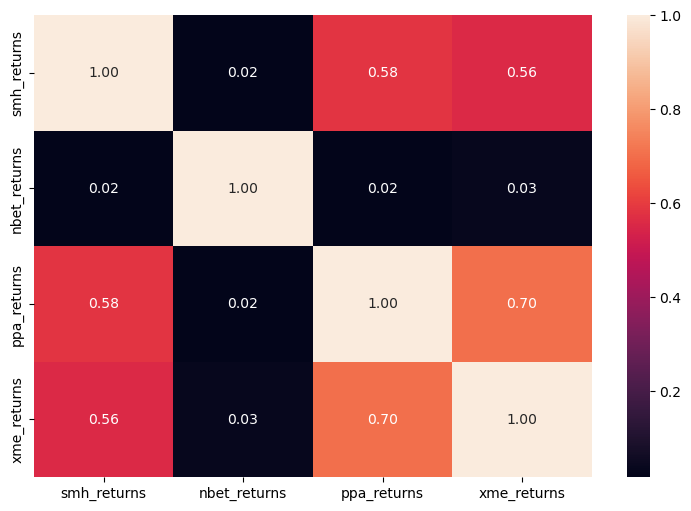

In [77]:
corr_mat = returns[["smh_returns","nbet_returns", "ppa_returns","xme_returns", "spdr_returns", "pph_returns"]].corr()
fig, ax = plt.subplots(1,1)
sns.heatmap(corr_mat,annot=True, fmt=".2f",ax=ax)
plt.xticks(["SMH", "NBET", "PPA", "XME", "SPDR", "PPH"])
plt.yticks(["SMH", "NBET", "PPA", "XME", "SPDR", "PPH"])
plt.title("Correlation Matrix for Returns")
fig.set_size_inches(9,6)

In [ ]:
a = np.random.normal(0.105, 0.15, 20)

[ 0.15953551  0.03168611  0.1296033   0.33262594 -0.0315929   0.04573709
  0.07018438 -0.09039246  0.12004259  0.17004797  0.04728637  0.1876902
  0.3283176   0.00147584  0.08209278  0.06094418  0.3711139   0.19090238
  0.26560754  0.07688337]


In [ ]:
b = np.random.normal(0.183,0.115,20)
b = b*0.4
b = b + 0.02736

[0.18328072 0.14671799 0.05939321 0.0457043  0.10318641 0.12465809
 0.08373966 0.0668236  0.14510114 0.1172506  0.09698516 0.06688137
 0.09751333 0.06582398 0.14282204 0.13485871 0.05705463 0.05839565
 0.16068772 0.13752576]


In [189]:
a = [1,2,3,4]
b = [5,6,7,8]

for idx,(n1,n2) in enumerate(zip(a,b)):
    print(idx,n1,n2)

0 1 5
1 2 6
2 3 7
3 4 8


In [203]:
sp_better_20 = 0
port_better_20 = 0

sp_better_10 = 0
port_better_10 = 0

all_port_sim = []
all_sp_sim = []

outperform = [0 for a in range(20)]

for i in range(20000):  
    a = np.random.normal(0.105, 0.175, 20) - 0.019
    b = np.random.normal(0.183,0.115,20)
    b = b*0.4
    b = b + 0.02736 - 0.019

    yield_sp = int(1)
    cum_yield_sp = []

    yield_port = int(1)
    cum_yield_port = []

    for i,(ret_sp,ret_port) in enumerate(zip(a,b)):
        yield_sp = yield_sp * (1 + ret_sp)
        cum_yield_sp.append(yield_sp)

        yield_port = yield_port * (1 + ret_port)
        cum_yield_port.append(yield_port)

        if yield_port >= yield_sp:
            outperform[i] += 1

    all_sp_sim.append(cum_yield_sp)
    all_port_sim.append(cum_yield_port)

    if cum_yield_port[-1] >= cum_yield_sp[-1]:
        port_better_20 += 1
    else:
        sp_better_20 += 1

    if cum_yield_port[9] >= cum_yield_sp[9]:
        port_better_10 += 1
    else:
        sp_better_10 += 1

In [204]:
outperform = [(a/20000)*100 for a in outperform]
outperform

[49.025,
 51.015,
 51.635,
 52.62,
 53.58500000000001,
 54.2,
 54.705000000000005,
 54.620000000000005,
 55.205000000000005,
 55.295,
 55.94,
 56.055,
 56.58,
 56.825,
 56.940000000000005,
 57.199999999999996,
 57.385,
 57.885,
 58.085,
 58.309999999999995]

In [205]:
mean_sim_port = []
mean_sim_sp = []
mean_sim_treasury = [1.0246**n for n in range(1,21)]

for i in range(20):
    sum_sp = 0
    sum_port = 0
    for j in range(10000):
        sum_sp += all_sp_sim[j][i]
        sum_port += all_port_sim[j][i]
    mean_sim_port.append(sum_port/10000)
    mean_sim_sp.append(sum_sp/10000)

mean_sim_port = [a*100 - 100 for a in mean_sim_port]
mean_sim_sp = [a*100 - 100 for a in mean_sim_sp]
mean_sim_treasury = [a*100 -100 for a in mean_sim_treasury]

In [206]:
outperform_sp = [100-a for a in outperform]

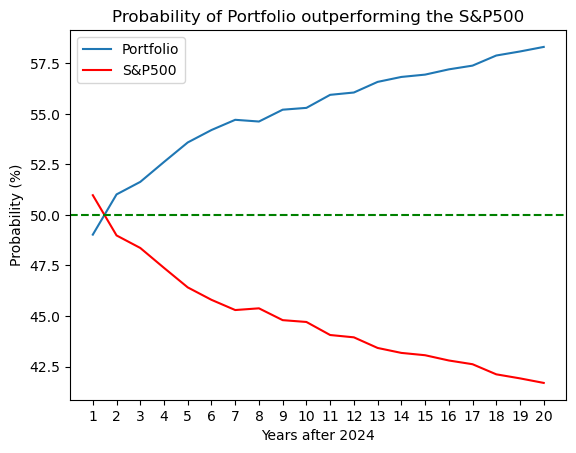

In [213]:
plt.plot(range(1,21), outperform, label="Portfolio")
plt.plot(range(1,21), outperform_sp, c='red', label="S&P500")
plt.axhline(50, linestyle='--',c='green')
plt.legend()
plt.xticks(range(1,21))
plt.title("Probability of Portfolio outperforming the S&P500")
plt.ylabel("Probability (%)")
plt.xlabel("Years after 2024")
plt.show()

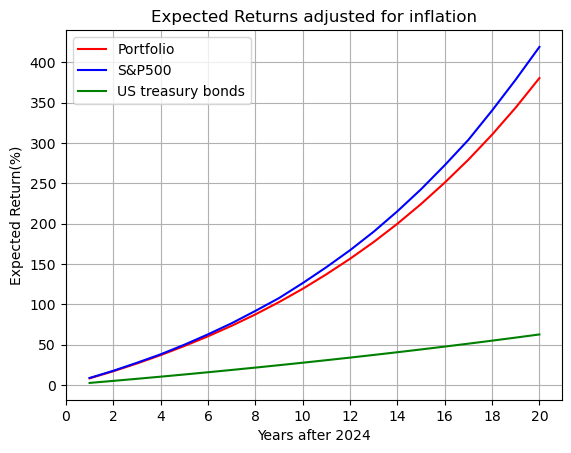

In [219]:
plt.plot(range(1,21), mean_sim_port, c='r', label="Portfolio")
plt.plot(range(1,21), mean_sim_sp, c='b', label="S&P500")
plt.plot(range(1,21), mean_sim_treasury, c='g', label="US treasury bonds")
plt.xticks(range(0,21,2))
plt.yticks(range(0,450,50))
plt.title("Expected Returns adjusted for inflation")
plt.ylabel("Expected Return(%)")
plt.xlabel("Years after 2024")
plt.grid(True)
plt.legend()

In [154]:
beat_proba_20 = port_better_20 / (port_better_20 + sp_better_20)
beat_proba_10 = port_better_10 / (port_better_10 + sp_better_10)

print(beat_proba_20)
print(beat_proba_10)

0.5848
0.557


In [ ]:
yield_10y = int(1)
cum_return_sp = []
for ret in a:
    yield_10y = yield_10y * (1 + ret)
    cum_return_sp.append(yield_10y)

1.1595355140830856
1.1962766894697014
1.3513180946514767
1.800801540794418
1.74390899802853
1.8236703165327501
1.9516634845853447
1.7752478237123712
1.9883531723808319
2.326468587815272
2.4364788438922025
2.8937820342407448
3.8438616164630144
3.8495345381211266
4.165553522934386
4.419419749061157
6.059527859092077
7.216306175306872
9.13301153534603
9.835188258167422


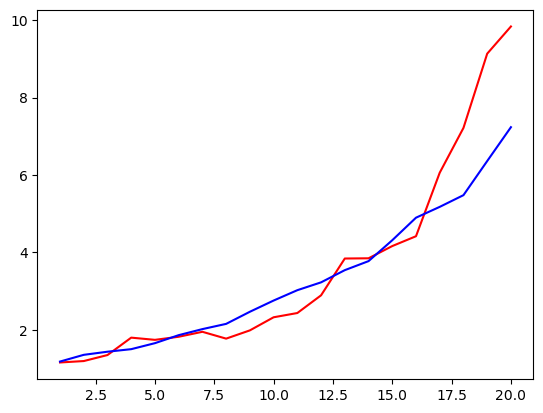

In [95]:
plt.plot(range(1,21), cum_return_sp, c='r')
plt.plot(range(1,21), cum_returns_port, c='b')